<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/80x15.png" /></a><div align="center">This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.</div>

# Python basics

This course assumes some familiarity with computer programming,
and basic knowledge of the Python programming language and NumPy,
such has you received in the **BIO 134** course.

For a quick refresher, you can have a look at:

* [Learn _X_ in _Y_ minutes, where _X=Python3_](https://learnxinyminutes.com/docs/python3/), <https://learnxinyminutes.com/docs/python3/>
* [NumPy for MATLAB users](http://mathesaurus.sourceforge.net/matlab-numpy.html), <http://mathesaurus.sourceforge.net/matlab-numpy.html>

## Lists

Lists are a built-in Python type, that provides an _ordered collection of items, possibly of different type._

To create a list, enclose the items in square brackets:

In [1]:
l = [1, 2.0, 'three']

You can access individual items of a list by using Python's `[]` operator:

In [2]:
l[0]

1

In [3]:
l[1]

2.0

**Note:** In Python, indices always start from 0.

You can also *modify* a list by assigning to specific places:

In [4]:
# replace 2nd item in `l`
l[1] = 2

# replace 4rd item in `l`
l[2] = 3

In [5]:
# `l` is now a fully numeric list
print(l)

[1, 2, 3]


Python provides a few built-in functions for computing features of lists of numbers:

In [6]:
# return number of items in list
len(l)

3

In [7]:
# return sum of numbers in list
sum(l)

6

In [8]:
# return maximum item in list
max(l)

3

In [9]:
# return minimum item in list
min(l)

1

A typical pattern is to build a list one item at a time, by starting with an empty list and appending items one at a time:

In [10]:
square5 = []
for n in range(5):
    square5.append(n)
    
print(square5)

[0, 1, 2, 3, 4]


In addition to `.append()` for appending items to a list, Python provides [many list operations](https://www.programiz.com/python-programming/methods/list), like `.sort()` for sorting a list *in-place*, `.count(x)` for counting the occurrences of an item `x`, etc.

## Functions

Functions are defined with the `def` keyword; after definition, they can be called anywhere by using the standard notation *fn(params)*.

Example:

In [11]:
def squares(nums):
    "Given a list `nums` of numbers, return list of their squares."
    result = []
    for item in nums:
        result.append(item * item)
    return result

s = squares([1,2,3])
print(s)

[1, 4, 9]


## Using external libraries

Python comes with little functionality built-in.  Most functions must be _imported_ from _packages_.

For instance the [`random`](https://docs.python.org/3/library/random.html) package provides functions for generating (pseudo) random numbers. With the following instruction, we can use all functions in the `random` package by prefixing their name with `random.`:

In [12]:
import random

In [13]:
# this yields a different result each time it's evaluated!
random.random()

0.6795477563512621

-----

## Exercise 1.

Generate a list of 10 random numbers.

In [14]:
# build list one item at a time
l = []
for _ in range(10):
    l.append(random.random())
    
print(l)

[0.42244749457518127, 0.6219383446829777, 0.47873887194193954, 0.03152956965112985, 0.6493286298750126, 0.023977433411354276, 0.5121476617808755, 0.25331491401826023, 0.19454816607854852, 0.4453151806000184]


## Exercise 2.

Write a function `randlist(N)` that generates and returns a list of *N* random numbers.

In [15]:
def randlist(N):
    "Return list of N random real numbers."
    # build list one item at a time
    result = []
    for _ in range(N):
        # random.random() picks a floating-point number 
        # uniformly at random from the interval [0,1)
        result.append(random.random())
    return result

l10 = randlist(10)

print(l10)

[0.21837104779072491, 0.8140491082022879, 0.5116915973653647, 0.7049152442977104, 0.3016672269813664, 0.09059306333726114, 0.5779885391022764, 0.6664641545353608, 0.13468799936258136, 0.8604320168147781]


## Exercise 3.

Write a function `avg(L)` which, given a list `L` of numbers, returns their mean value.

In [16]:
def avg(L):
    "Return average value of (numeric) list L."
    return (sum(L) / len(L))

Examples:

In [17]:
avg([1,2,3])

2.0

In [18]:
avg([1,1,1,1,1])

1.0

## Exercise 4. 

Write a function `median(L)` which, given a list `L` of numbers, returns their median value.

In [19]:
def median(L):
    "Return median value of (numeric) list L."
    n = len(L)
    L.sort()  # sort L in-place
    if (n % 2) == 1:
        # median value if the middle value of (sorted!) list L
        return L[n//2]
    else:  
        # median value is the average of the two middle values of L
        return 1/2 * (L[n//2] + L[n//2 - 1])

Examples:

In [20]:
median([1,2,3])

2

In [21]:
median([1,2,3,4])

2.5

In [22]:
median([1,1,1,1,1])

1

## Exercise 5. _(difficult)_ 

Write a function `mode(L)` which, given a list `L` of numbers, returns its *mode*, i.e., the number that occurs most frequently in the list or `None` if the distribution of values is multi-modal. _(Hint: use dictionaries.)_

In [23]:
def mode(L):
    "Return mode of L.  If L is multi-modal, then return `None`."
    # we keep a record of where the items with the highest frequency occur;
    # for this we need to keep a record of the highest frequency seen so far (peak)
    # and the values in L that achieve this frequency (peak_items, for there can be more than one)
    peak = None
    peak_items = []
    # compute distribution of values of L
    dist = {}
    for item in L:
        if item in dist:
            dist[item] += 1
        else:
            dist[item] = 1
        # also keep a record of where the peek(s) are
        count = dist[item]
        # `peak` is `None` on first iteration
        if peak is None or count > peak:
            # we have a new peak!
            peak_items = [item]
            peak = count
        elif count == peak:
            # add to existing peaks
            peak_items.append(item)
    # if we have more then one peak, distribution is multi-modal
    if len(peak_items) > 1:
        return None
    else:
        return peak_items[0]

Examples:

In [24]:
print(mode([1,2,3]))

None


In [25]:
print(mode([1,1,2,1,3,1]))

1


-----

## Plotting

[Matplotlib](http://matplotlib.org/gallery.html) is the most-used plotting library in the Python community: it provides a large array of (mostly low level) facilities for making plots, and a more high-level interface largely inspired by MATLAB plotting system.

[Seaborn](http://seaborn.pydata.org/index.html) is an add-on library that provides:

* better default visual styles
* easier plotting functions for many commonly-used types of plots

In [26]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

Function `sns.barplot` can be used to make a bar plot:

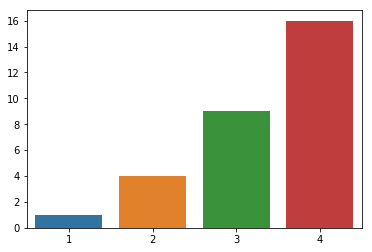

In [27]:
sns.barplot(x=[1,2,3,4], y=[1,4,9,16])

Function `plt.plot()` is used to make a line plot instead (*note:* no explicit `x=` and `y=` here):

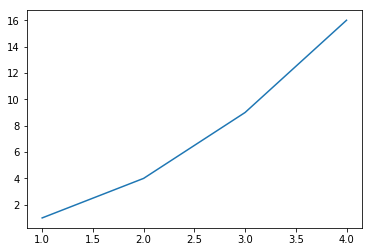

In [28]:
plt.plot([1,2,3,4], [1,4,9,16])

NumPy arrays can (and should!) be used in place of lists when doing any serious plotting.

Placing plots side-by-side or arranging them in a grid takes a bit more work:

1. Initialize a grid of plots, through function `fig, axes = plt.subplots(rows, columns)`.
2. Select the position of a plot in the grid by extracting its "canvas" from the `axes` array: first index is row (0 = top), second index is column (0 = leftmost): e.g., `canvas = axes[1][2]` is the third column plot on second row.
3. Place a plot: for the `sns.*plot()` functions the canvas is just an additional parameter `ax=...`, for line plots one must change `plt.` with the canvas object.

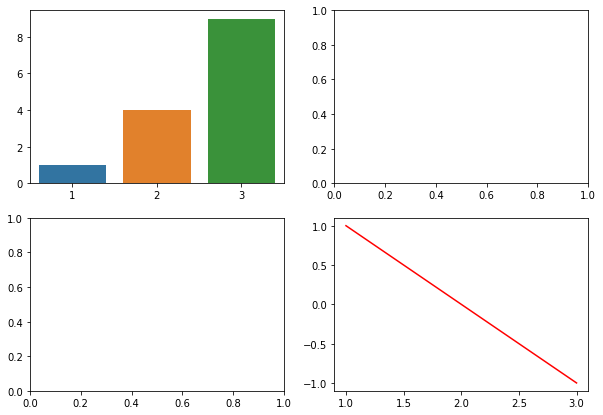

In [29]:
# initialize a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=[10, 7])

# `axes` is the grid of plotting canvaes: axes[row][col]
ul = axes[0][0]  # upper left
ur = axes[0][1]  # upper right
ll = axes[1][0]  # lower left
lr = axes[1][1]  # lower right

# the `sns.*plot()` functions require the drawing canvas as additional parameter `ax=`
sns.barplot(x=[1,2,3], y=[1,4,9], ax=ul)

# in the `plot.plot()` function one must substitute `plt.` with the canvas object
lr.plot([1,2,3], [1,0,-1], color='red')

## NumPy

NumPy is a Python package that provides:

* a multi-dimensional *array* and whole-array operations
* fast matrix and vector operations _(not covered here)_
* a library of mathematical functions

To use NumPy in your code, you first need to import it:

In [30]:
import numpy as np

After this `import ... as` statement, you can use all NumPy functions by prefixing them with `np.`

## NumPy arrays

NumPy’s main object is the homogeneous multidimensional array. It is a table of elements (usually numbers), all of the same type, indexed by a tuple of positive integers.

NumPy arrays (also called *ndarray*) are [constructed](https://docs.scipy.org/doc/numpy/user/basics.creation.html) with function `np.array`::

In [31]:
a = np.array([1, 2, 3, 4, 5])

They behave behave a lot like Python lists:

In [32]:
# get items using the [] operator
a[0]

1

In [33]:
# get a slice using [:]
a[0:3]

array([1, 2, 3])

Note that again, a slice of a *ndarray* is again a *ndarray*.

In [34]:
# set an item using [] =
a[4] = 0

In [35]:
print(a)

[1 2 3 4 0]


Adding elements to an *ndarray* does not work as for *lists*

In [36]:
a.append(4)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

Note that *ndarray*'s are **homogeneous** -- you cannot mix e.g. numbers and strings, but neither integers and floats:

In [37]:
a[4] = 'five'

ValueError: invalid literal for int() with base 10: 'five'

In [38]:
# here, the `5.5` is automatically converted to integer
a[4] = 5.5

In [39]:
a

array([1, 2, 3, 4, 5])

### Setting the type of array items

Arrays are homogeneous (all elements must have the same type) and the [type](https://docs.scipy.org/doc/numpy/user/basics.types.html) is set at array creation time:

In [40]:
a = np.array([1, 2, 3, 4, 5], dtype=np.float64)

a[4] = 5.5

# show a
print(repr(a))

array([1. , 2. , 3. , 4. , 5.5])


### Shortcuts for creating special arrays

Functions are available to create special arrays and matrices (see [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html#numpy.eye) for a complete reference):
    
* [`np.zeros(n)`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html#numpy.diag) return a 1D array of zeros with `n` elements;
* [`np.ones(n)`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html#numpy.diag) return a 1D array of 1's with `n` elements;
* [`np.random.rand(n)`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html#numpy.diag) return a 1D array of `n` random values, sampled from a uniform distribution over the real interval `[0, 1)`.
* [`np.random.randn(n)`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html#numpy.diag) return a 1D array of `n` random values, sampled from a univariate “normal” (Gaussian) distribution of mean 0 and variance 1.

The `np.arange()` function can be used to generate an *ndarray* containing equally-spaced points from an interval on the real line:

In [41]:
# points in the interval [0,4) spaces 0.1 apart 
x = np.arange(0, 4, 0.1)

In [42]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9])

We can easily create an array with constant value:

In [43]:
y1 = np.ones(len(x))

In [44]:
y1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

A line plot of y1 over x will just show a flat horizontal line:

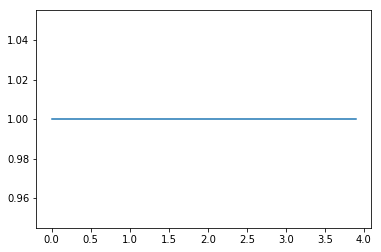

In [45]:
plt.plot(x, y1)

The `np.linspace()` function works just like `np.arange()` but its third parameter is the *number of subdivisions of the interval* (as opposed to the difference of two consecutive points):

In [46]:
y2 = np.linspace(0.5, 3, len(x))

In [47]:
y2

array([0.5       , 0.56410256, 0.62820513, 0.69230769, 0.75641026,
       0.82051282, 0.88461538, 0.94871795, 1.01282051, 1.07692308,
       1.14102564, 1.20512821, 1.26923077, 1.33333333, 1.3974359 ,
       1.46153846, 1.52564103, 1.58974359, 1.65384615, 1.71794872,
       1.78205128, 1.84615385, 1.91025641, 1.97435897, 2.03846154,
       2.1025641 , 2.16666667, 2.23076923, 2.29487179, 2.35897436,
       2.42307692, 2.48717949, 2.55128205, 2.61538462, 2.67948718,
       2.74358974, 2.80769231, 2.87179487, 2.93589744, 3.        ])

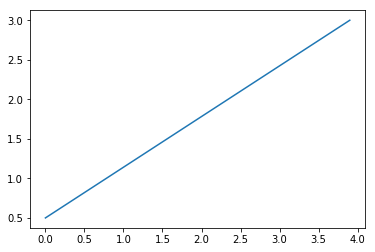

In [48]:
plt.plot(x, y2)

-----

## Exercise 6.

How can you modify the plotting code above to make the line red?  How can you make it thicker?

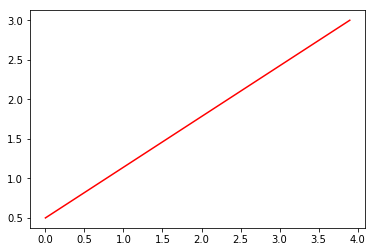

In [49]:
# line color is controlled by additional parameter `color=`
plt.plot(x, y2, color='red')

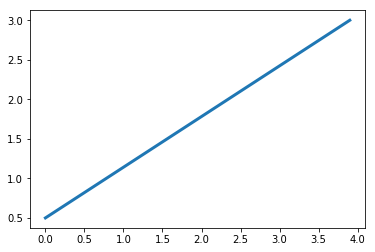

In [50]:
# line width is controlled by an additional parameter `linewidth=`
plt.plot(x, y2, linewidth=3)

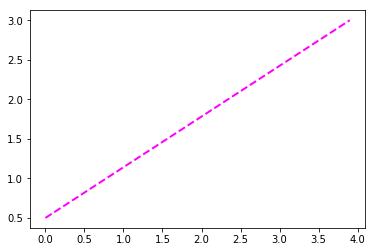

In [51]:
# they can be combined (with other parameters added too)
plt.plot(x, y2, color='magenta', linewidth=2, linestyle='--')

-----

Plotting different series of data in the same figure requires a bit more work:

1. First use the [`plt.subplots`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplots) function to create *figure* and an *axes* object
2. An [*axes* object](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes) is a "frame" for a single plot -- use methods [`.plot()`](http://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot) to lay a graph onto the canvas.  Each invocation of [`.plot()`](http://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot) *adds* a plot onto the canvas. 
3. The [*figure* object](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure) contains all the axes can be used for saving the final output with [`.savefig()`](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure.savefig)

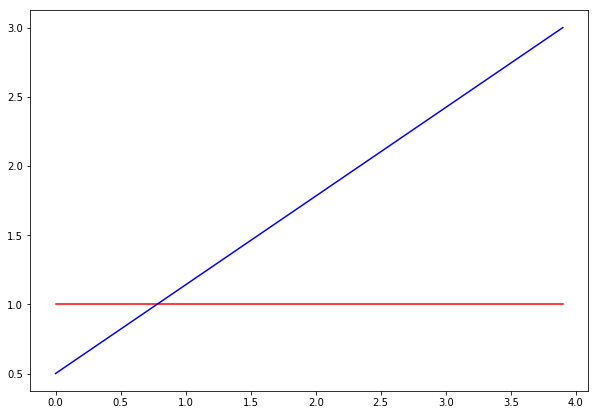

In [52]:
fig, ax = plt.subplots(1, 1, figsize=[10, 7])

ax.plot(x, y1, color='red')
ax.plot(x, y2, color='blue')

## Whole-array operations

NumPy arrays implement operators `+`, `-`, `*`, `/` as *element-wise operations*.

For instance, the array sum `a+b` is the array whose `i`-th element is `a[i]+b[i]`:

In [53]:
a = np.array([1, 2, 3])
b = np.array([0.1, 0.2, 0.3])
c = a + b

In [54]:
c

array([1.1, 2.2, 3.3])

Operations involving an array and a scalar value promote the scalar to a constant array having the same *shape*:

In [55]:
y_a = y2 + 1.0
y_b = y2 - 1.0

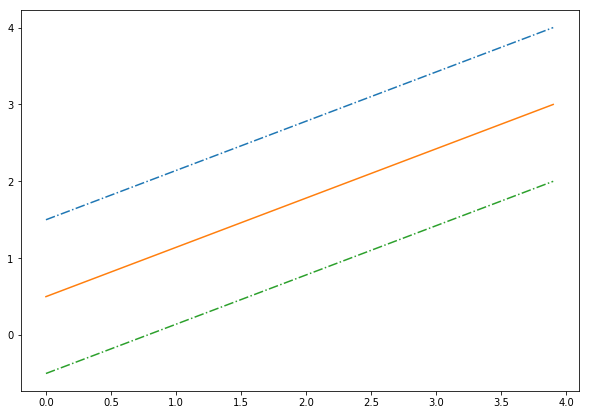

In [56]:
fig, ax = plt.subplots(1, 1, figsize=[10, 7])

ax.plot(x, y_a, linestyle='-.')
ax.plot(x, y2)
ax.plot(x, y_b, linestyle='-.')

-----

## Exercise 7.

Plot the graph of function $f(x) = 1/x$

/home/rmurri/w/anaconda3/5.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


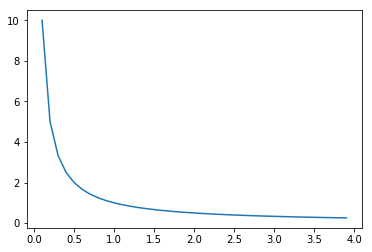

In [57]:
# thanks to whole-array operations, the array holding the 
# values $1/x_i$ for all $x_i$ in x is written just 1/x
plt.plot(x, 1/x)

-----

# Mathematical functions

NumPy provides a [vast choice of mathematical functions](https://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs) that *operate element-wise on arrays:* among them `np.sin`, `np.cos`, `np.tan`,
`np.log`, `np.log2`, `np.log10`, `np.exp`.

-----

## Exercise 8.

Plot the functions $sin(x)$ and $2 \cdot cos(x) - 1$ on the interval $[-\pi, +\pi]$.

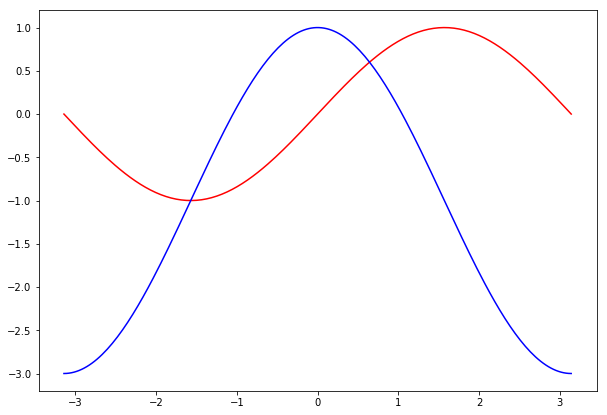

In [58]:
# define the x-axis range
x = np.linspace(-np.pi, +np.pi, 200)

# define the y-axis values
y1 = np.sin(x)
y2 = 2 * np.cos(x) - 1

# plot them over the same canvas
fig, ax = plt.subplots(1, 1, figsize=[10, 7])

ax.plot(x, y1, color='red')
ax.plot(x, y2, color='blue')

-----

## Saving and loading

NumPy provides functions [`array = np.loadtxt(filename, dtype)`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html#numpy.loadtxt) and [`np.savetxt(filename, array)`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.savetxt.html) that should be used to do *efficient* I/O of large arrays.

SciPy additionally provides functions [`scipy.io.loadmat()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html) and [`scipy.io.loadmat()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.savemat.html) to load/save matrices in MATLAB `.mat` format.

## Further reading

Nicolas Rougier has written excellent tutorials on the use of Matplotlib and NumPy:

* [Matplotlib tutorial](https://www.labri.fr/perso/nrougier/teaching/matplotlib/)
* [NumPy tutorial](http://www.labri.fr/perso/nrougier/teaching/numpy/numpy.html)

The Seaborn library comes with a good tutorial written by its author (note that -since Seaborn is an add-on to Matplotlib- some knowledge of Matplotlib is assumed):

* [Seaborn tutorial](http://seaborn.pydata.org/tutorial.html)